# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(28)
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
df.pop('Unnamed: 0')
df.pop('index')
df.pop('mau')

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Name: mau, Length: 15000, dtype: bool

In [5]:
quant = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
quant.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [6]:
tabela = quant.corr()
tabela

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


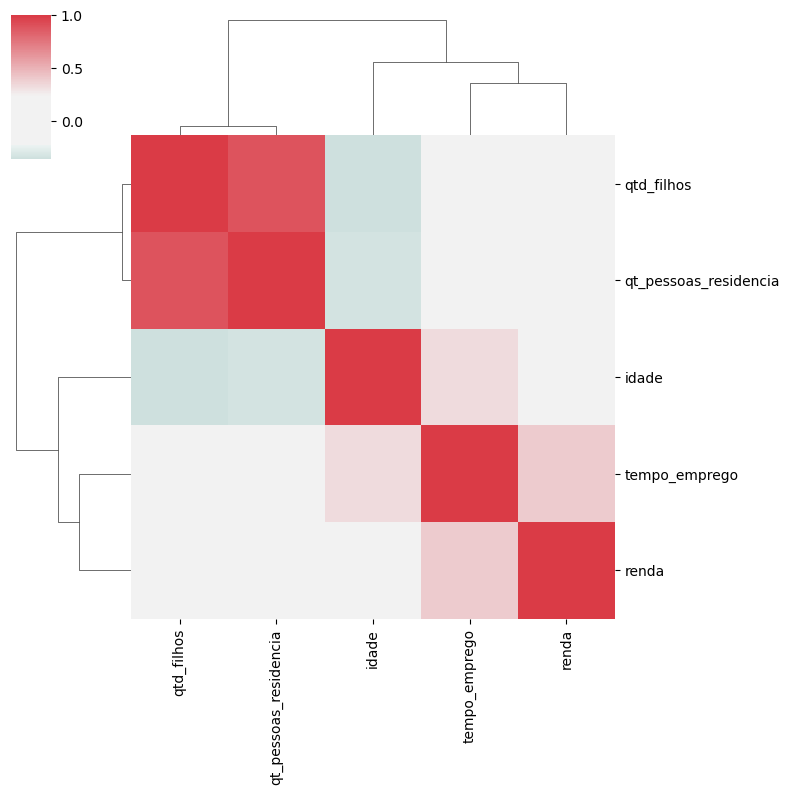

In [7]:
cmap = sns.diverging_palette(h_neg=180, h_pos=370, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(tabela, figsize=(8, 8), center = 0, cmap=cmap)

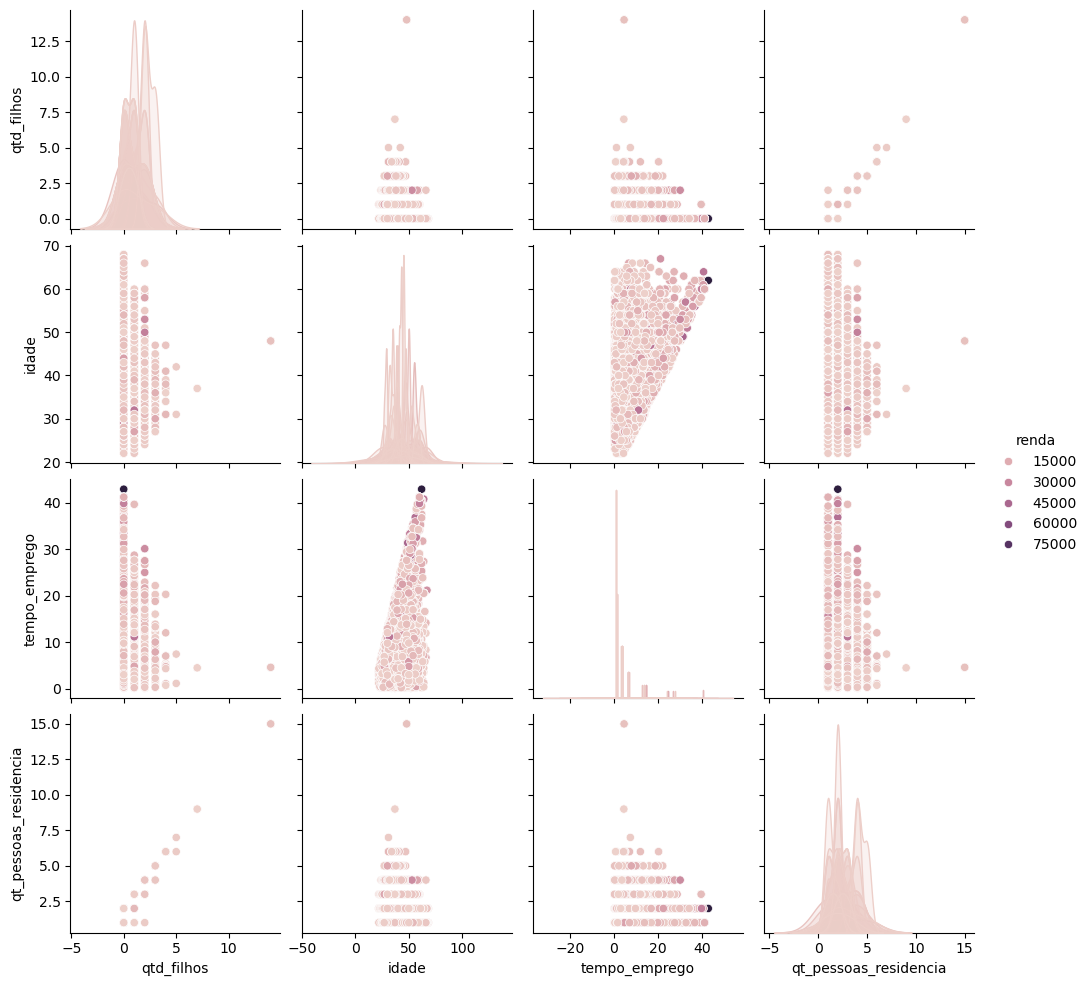

In [8]:
sns.pairplot(quant, hue='renda')

1)Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

É possivel avaliar atravéz da matriz de dispersão que o fator tempo de emprego so apresenta relação positiva com a renda e com a idade.
Mostrando que existe uma valorização de profissionais mais experientes e acostumados com a função
Existe uma redundancia grande entre o numero de filhos e quantidade pessoas na residencia que é visivel no grafico e na logica. uma ves que
costumeiramente os filhos vivem com os pais. com isso quanto mais filhos mais pessoas na residencia

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

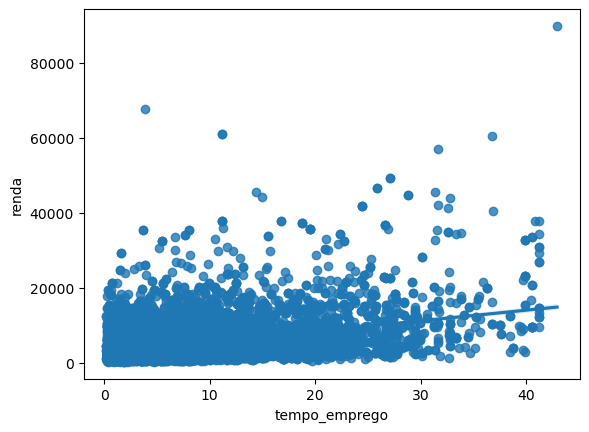

In [12]:
sca = sns.regplot(x='tempo_emprego', y='renda', data = df)

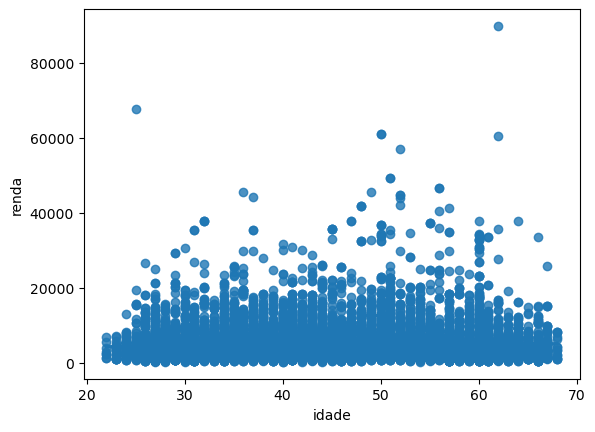

In [26]:
sca = sns.regplot(x='idade', y='renda', data = df)

3) Na su aopinião, há outliers na variável renda?

In [ ]:
Sim, é possível afirmar que existem outliers. Os pontos muito distantes da curva confirmam essa afirmação.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

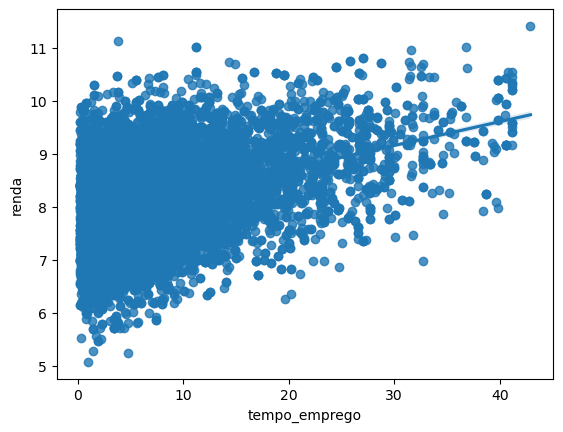

In [28]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])
sca = sns.regplot(x='tempo_emprego', y='renda', data = df_log)

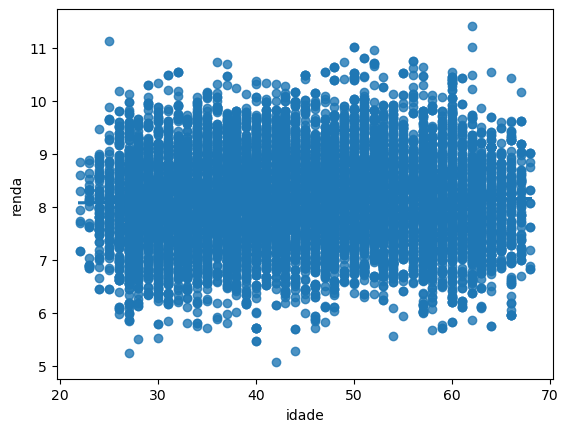

In [30]:
sca = sns.regplot(x='idade', y='renda', data = df_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
O logaritmo melhorou a analize uma vez que reduziu os outliers e trazendo os pontos mais proximo a curva.